# step -1 importing libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install -U matplotlib
!pip install seaborn
!pip install --no-cache-dir jupyter-dash
!pip install dash

# Step - 2 Create the Data Frame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Step - 3 Clean the data

In [4]:
df.info() #summury for data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
# Check statiscal summary for dataframe
df.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


# Step - 4 Check for Dupliacte values 

In [6]:
duplicates = df.duplicated().sum()
duplicates

0

# if any duplicates find then drop the duplicates

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Step - 5 Check any null values or not 

In [8]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [9]:
df = df.dropna() # if you have any null values then drop it.

In [10]:
df.shape #shows your rows and columns

(148, 7)

In [11]:
# Check datatypes of each column in dataframe
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

# Step - 6 Check inside data
1) rate column have 4.1/5 to 4.1 
   if diffrent moduls like 4.1/5,4.1/3 then use regex

In [12]:
df['rate'] = df['rate'].str.replace('/5','',regex= False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
print(df.dtypes)

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object


In [14]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Type of resturants
what type of resturant do the majority of customers order from?

In [15]:
df_type_res = df[df['online_order']=="Yes"].groupby('listed_in(type)').size()
df_type_res.sort_values(ascending = False)


listed_in(type)
Dining    33
Cafes     15
other      6
Buffet     4
dtype: int64

Text(0.5, 0, 'type of resturant')

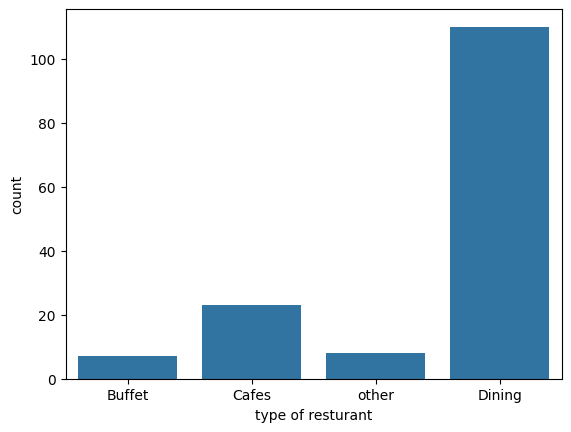

In [16]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

# conclusion - majority go with dinning 

# How many votes has each type of resturant received from customers?

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [18]:
df_votes = df.groupby('listed_in(type)')['votes'].sum()
df_votes

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

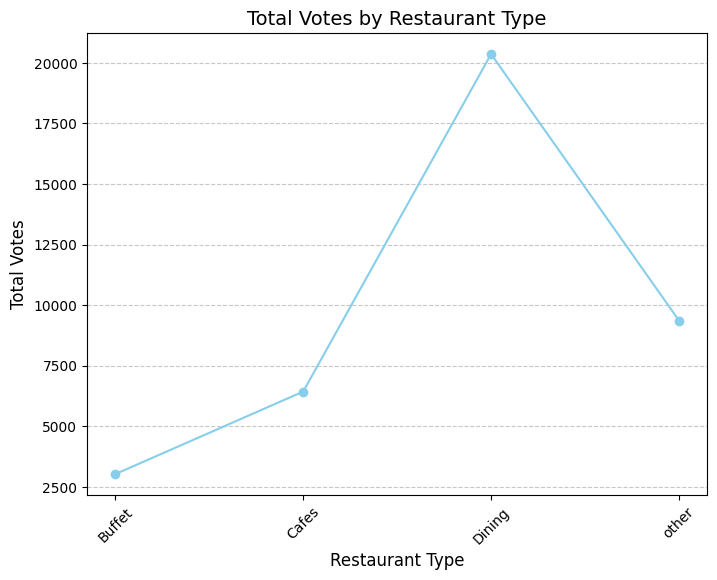

In [19]:
plt.figure(figsize=(8, 6))  # Set the figure size
# df_votes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.plot(df_votes.index, df_votes.values, marker='o', linestyle='-', color='skyblue', label='Total Votes')
# Add labels and title
plt.title('Total Votes by Restaurant Type', fontsize=14)
plt.xlabel('Restaurant Type', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Conclusion - Dinning restuarants has received maximum orders

# What are the ratings that the majority of restaurants have received?

In [ ]:
df.head()

In [20]:
df_res = df['rate'].mode()[0]
df_res

3.8

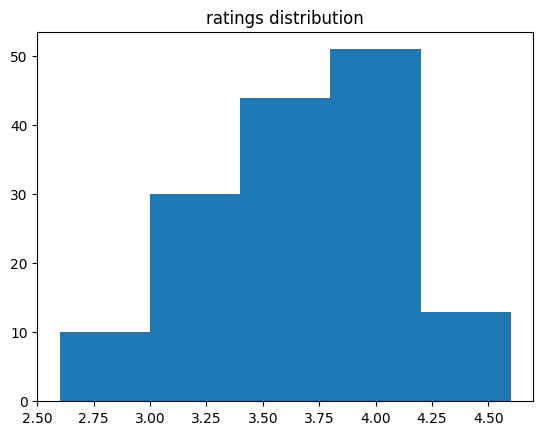

In [21]:
plt.hist(df['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

# Conclusion - majority rating between 3.5 to 4

# most couple orders online . what is their average spending on each order?

In [ ]:
df.head()

In [22]:
df_online_order = df[df['online_order']=='Yes']

df_average_spending = df_online_order['approx_cost(for two people)'].mean()
df_average_spending

510.3448275862069

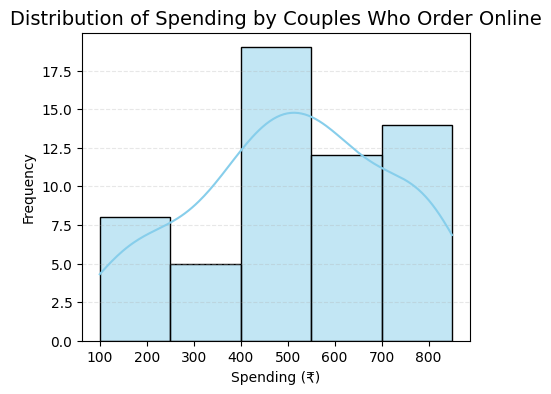

In [23]:
plt.figure(figsize=(5, 4))
# plt.hist(df_online_order['approx_cost(for two people)'], bins=5, color='yellow', edgecolor='black', alpha=0.5)
sns.histplot(data=df_online_order, x='approx_cost(for two people)', bins=5, kde=True, color='skyblue')
# Add labels, title, and grid
plt.title('Distribution of Spending by Couples Who Order Online', fontsize=14)
plt.xlabel('Spending (₹)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
# plt.tight_layout()
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

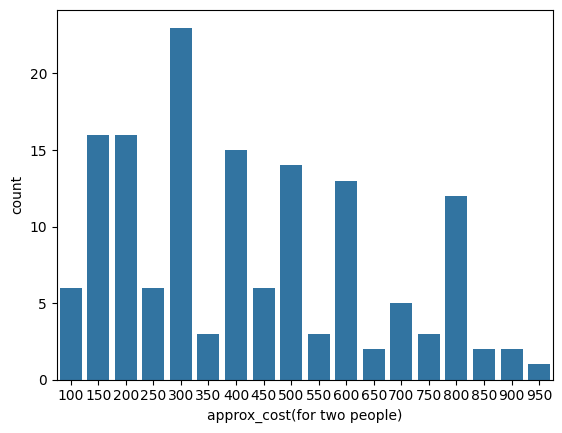

In [24]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)


# Conclusion - the majority of couples preffre restaurant with an approximate cost 300 rs.

# Which mode (online or offline ) recived maximum ratings?

In [25]:
# df.head()
df_max_rate = df.groupby('online_order')['rate'].mean().idxmax()
df_max_rate

'Yes'

In [1]:
import pandas as pd
from jupyter_dash import JupyterDash
import dash
from dash import dcc, html
import plotly.express as px
import numpy as np

# Load the CSV data
df = pd.read_csv('Zomato data .csv')

# Group the data by restaurant type and sum the votes
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().reset_index()

# Filter data to include only restaurants that offer online orders
online_orders_df = df[df['online_order'] == 'Yes']

# Calculate the average spending for online orders by restaurant type
average_spending = online_orders_df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().reset_index()


# Create the app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Restaurant Data"),
    
    # Dropdown for selecting restaurant type
    dcc.Dropdown(
        id='type-dropdown',
        options=[
            {'label': type, 'value': type} for type in df['listed_in(type)'].unique()
        ],
        value='Buffet',  # Default value
        multi=False
    ),
    
    # Graph to show restaurant ratings
    dcc.Graph(
        id='rating-graph'
    ),
    
    # Pie chart to show majority online order type
    dcc.Graph(
        id='online-order-pie'
    ),
    
    # Bar chart to show total votes for each restaurant type
    dcc.Graph(
        id='votes-by-type'
    ),
    
    # Bar chart to show average spending on online orders by restaurant type
    dcc.Graph(
        id='avg-spending-online-orders'
    )
])

# Callback to update the graph based on selected restaurant type
@app.callback(
    dash.dependencies.Output('rating-graph', 'figure'),
    [dash.dependencies.Input('type-dropdown', 'value')]
)
def update_graph(selected_type):
    filtered_df = df[df['listed_in(type)'] == selected_type]
    
    # Create a bar plot showing restaurant ratings
    fig = px.bar(
        filtered_df,
        x='name',
        y='rate',
        color='name',
        labels={'name': 'Restaurant Name', 'rate': 'Rating'},
        title=f'Restaurant Ratings for {selected_type} Type'
    )
    
    return fig

# Callback to update the pie chart showing majority online order type
@app.callback(
    dash.dependencies.Output('online-order-pie', 'figure'),
    [dash.dependencies.Input('type-dropdown', 'value')]
)
def update_pie_chart(selected_type):
    filtered_df = df[df['listed_in(type)'] == selected_type]
    
    # Count the online orders (Yes vs No)
    order_counts = filtered_df['online_order'].value_counts()
    
    # Create a pie chart
    fig = px.pie(
        values=order_counts,
        names=order_counts.index,
        title=f'Majority Online Order Type for {selected_type} Restaurants'
    )
    
    return fig

# Callback to update the bar chart showing total votes for each restaurant type
@app.callback(
    dash.dependencies.Output('votes-by-type', 'figure'),
    [dash.dependencies.Input('type-dropdown', 'value')]
)
def update_votes_by_type(selected_type):
    # Create a bar plot showing total votes for each restaurant type
    fig = px.bar(
        votes_by_type,
        x='listed_in(type)',
        y='votes',
        labels={'listed_in(type)': 'Restaurant Type', 'votes': 'Total Votes'},
        title='Total Votes by Restaurant Type'
    )
    
    return fig

# Callback to update the bar chart showing average spending for online orders by restaurant type
@app.callback(
    dash.dependencies.Output('avg-spending-online-orders', 'figure'),
    [dash.dependencies.Input('type-dropdown', 'value')]
)
def update_avg_spending_scatter(selected_type):
    # Filter the data for the selected type of restaurant and calculate the average spending
    filtered_spending = average_spending[average_spending['listed_in(type)'] == selected_type]
    
    # Create a scatter plot showing average spending on online orders
    fig = px.scatter(
        filtered_spending,
        y='listed_in(type)',
        x='approx_cost(for two people)',
        labels={'listed_in(type)': 'Restaurant Type', 'approx_cost(for two people)': 'Average Spending (for two)'},
        title=f'Average Spending for Online Orders in {selected_type} Restaurants',
        color='listed_in(type)',  # Color points based on restaurant type
        size='approx_cost(for two people)',  # Size of the dots based on spending
        hover_name='listed_in(type)',  # Tooltip will show restaurant type
    )
    
    return fig



# Run the app in external mode
app.run_server(mode='external')

C:\Python\lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on http://127.0.0.1:8050/
